# A possible explanation for SG's recent spike in COVID-19 cases

Data sourced from: [Our World in Data](https://ourworldindata.org/), pulled from [here](https://github.com/owid/covid-19-data/tree/master/public/data)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [154]:
covid = pd.read_csv("./owid-covid-data.csv")
print('input records, fields:', covid.shape)

covid['date'] = pd.to_datetime(covid['date'])

# list of countries to compare...
iso_list = ['HKG', 'TWN', 'SGP']

cols = [
    'iso_code',
    'date',
    'new_cases', 'new_cases_smoothed',
    'new_tests', 'new_tests_smoothed',
    'new_cases_per_million', 'new_cases_smoothed_per_million',
    'new_tests_per_thousand', 'new_tests_smoothed_per_thousand'
]

cols_dict = {
    'new_cases': 'cases',
    'new_cases_smoothed': 'cases_7d',
    'new_tests': 'tests',
    'new_tests_smoothed': 'tests_7d',
    'new_cases_per_million': 'cases_1mm',
    'new_cases_smoothed_per_million': 'cases_1mm_7d',
    'new_tests_per_thousand': 'tests_1k',
    'new_tests_smoothed_per_thousand': 'tests_1k_7d'
}

# april onward
covid_filtered = covid.loc[covid['iso_code'].isin(iso_list) & (covid['date']>='2021-04-01'), cols]
covid_filtered = covid_filtered.rename(columns=cols_dict)
covid_filtered = pd.pivot_table(
    covid_filtered,
    values=list(cols_dict.values()),
    index='date',
    columns='iso_code',
    aggfunc=np.sum
)
covid_filtered.columns = [':'.join(col).strip() for col in covid_filtered.columns.values]

print('output records, fields:', covid_filtered.shape)
print('Up to date as of:', max(covid['date']))

input records, fields: (138255, 67)
output records, fields: (250, 24)
Up to date as of: 2021-12-06 00:00:00


# SG cases began to spike starting in Sept., far outpacing HK or TW

In [146]:
# fig, ax = plt.subplots(figsize=(18, 8))
# sg, = ax.plot(covid_filtered['cases_7d:SGP'], c='burlywood', lw=2, label='SG')
# hk, = ax.plot(covid_filtered['cases_7d:HKG'], c='darkred', lw=2, label='HK')
# tw, = ax.plot(covid_filtered['cases_7d:TWN'], c='teal', lw=2, label='TW')
# sg_cases, = ax.plot(covid_filtered['cases:SGP'], c='grey', ls='dotted', lw=0.7)
# hk_cases, = ax.plot(covid_filtered['cases:HKG'], c='grey', ls='dotted', lw=0.7)
# tw_cases, = ax.plot(covid_filtered['cases:TWN'], c='grey', ls='dotted', lw=0.7)

# ax.set_title('Cases and 7 day trailing avg for SG, TW, HK')
# ax.legend(handles=[sg, hk, tw])

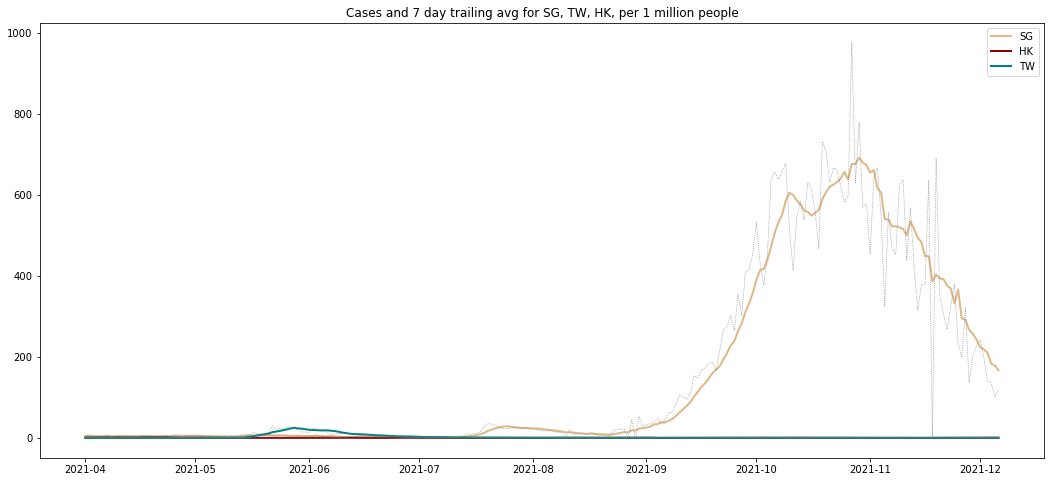

In [151]:
fig, ax = plt.subplots(figsize=(18, 8))
sg, = ax.plot(covid_filtered['cases_1mm_7d:SGP'], c='burlywood', lw=2, label='SG')
hk, = ax.plot(covid_filtered['cases_1mm_7d:HKG'], c='darkred', lw=2, label='HK')
tw, = ax.plot(covid_filtered['cases_1mm_7d:TWN'], c='teal', lw=2, label='TW')
sg_cases, = ax.plot(covid_filtered['cases_1mm:SGP'], c='grey', ls='dotted', lw=0.7)
hk_cases, = ax.plot(covid_filtered['cases_1mm:HKG'], c='grey', ls='dotted', lw=0.7)
tw_cases, = ax.plot(covid_filtered['cases_1mm:TWN'], c='grey', ls='dotted', lw=0.7)

ax.set_title('Cases and 7 day trailing avg for SG, TW, HK, per 1 million people')
ax.legend(handles=[sg, hk, tw])

# SG has only slightly elevated testing rates per capita compared to HK

Rate of testing has been fairly stable from April to December with the exception of Taiwan who only slightly ramped up testing after cases began to appear in May
(see [CNN](https://edition.cnn.com/2021/05/17/asia/taiwan-covid-outbreak-intl-hnk/index.html?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+rss%2Fcnn_topstories+%28RSS%3A+CNN+-+Top+Stories%29https://edition.cnn.com/2021/05/17/asia/taiwan-covid-outbreak-intl-hnk/index.html?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+rss%2Fcnn_topstories+%28RSS%3A+CNN+-+Top+Stories%29) 5/17,
and [Guardian](https://www.theguardian.com/world/2021/jun/07/a-victim-of-its-own-success-how-taiwan-failed-to-plan-for-a-major-covid-outbreakhttps://www.theguardian.com/world/2021/jun/07/a-victim-of-its-own-success-how-taiwan-failed-to-plan-for-a-major-covid-outbreak) 7/7)

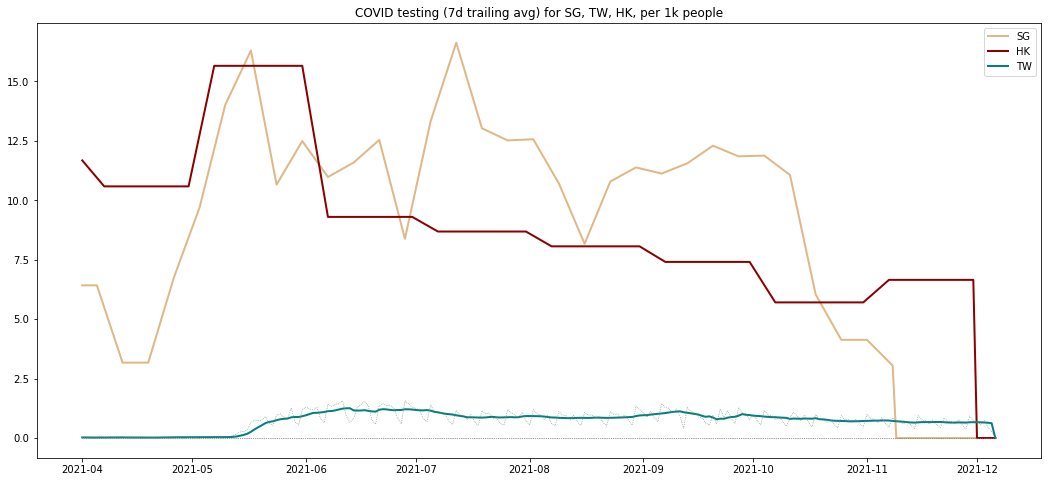

In [149]:
fig, ax = plt.subplots(figsize=(18, 8))
sg, = ax.plot(covid_filtered['tests_1k_7d:SGP'], c='burlywood', lw=2, label='SG')
hk, = ax.plot(covid_filtered['tests_1k_7d:HKG'], c='darkred', lw=2, label='HK')
tw, = ax.plot(covid_filtered['tests_1k_7d:TWN'], c='teal', lw=2, label='TW')
sg_cases, = ax.plot(covid_filtered['tests_1k:SGP'], c='grey', ls='dotted', lw=0.7)
hk_cases, = ax.plot(covid_filtered['tests_1k:HKG'], c='grey', ls='dotted', lw=0.7)
tw_cases, = ax.plot(covid_filtered['tests_1k:TWN'], c='grey', ls='dotted', lw=0.7)

ax.set_title('COVID testing (7d trailing avg) for SG, TW, HK, per 1k people')
ax.legend(handles=[sg, hk, tw])

more targeted testing?

TraceTogether - higher rates of contact tracing

# SG: sustained rate of testing, but ratio of tests to confirmed cases plummeted

Two possible explanations. Could either indicate a legitimate spike in confirmed cases or more evidence of success of targeted testing.

Text(0.5, 1.0, 'Ratio of tests to confirmed cases')

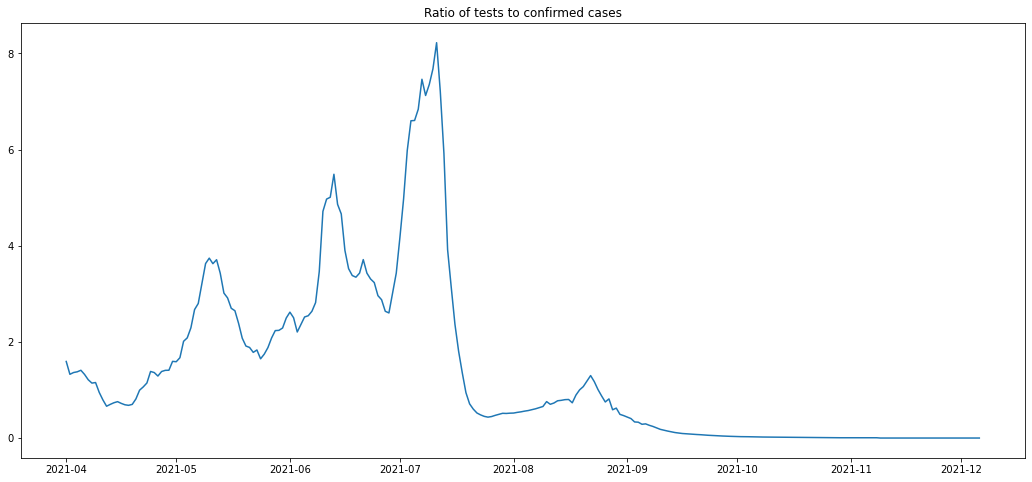

In [163]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(covid_filtered['tests_1k_7d:SGP'] / covid_filtered['cases_1mm_7d:SGP'])

ax.set_title('Ratio of tests to confirmed cases')

- 2021-08-27, additional ARTs 